## Plotting Sea Ice in MOM01v5 KDS75

This script plots sea ice concentration with CC functionality.


In [1]:
# Load modules
%matplotlib inline

import cosima_cookbook as cc

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


netcdf_index loaded.


In [2]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 35659:127.0.0.1:35659 vdi-n8.nci.org.au -l amh157


Client Scheduler: tcp://127.0.0.1:35901 Dashboard: http://127.0.0.1:35659/status,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [3]:
configuration = 'mom01v5'
expts = cc.get_experiments(configuration)
display(expts)


['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_newbathy_JRA_runoff',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind',
 'kds75_cp',
 'kds75_wp2']

In [6]:
expt='kds75_wp2'
mld= cc.get_nc_variable(expt,
                    'ocean_month.nc',
                    'mld',
                    time_units='days since 1860-01-01',
                    )
mean_mld = mld.sel(yt_ocean=slice(-80,-30)).sel(time='1975-09').mean('time')
mean_mld.plot.pcolormesh()

FileNotFoundError: [Errno 2] No such file or directory: b'/g/data3/hh5/tmp/cosima/mom01v5/kds75_wp2/output482/ocean_month.nc'

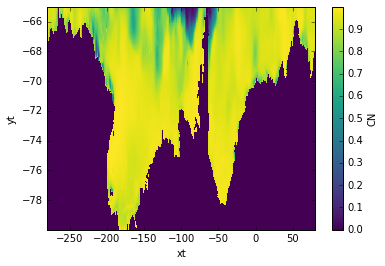

In [11]:
pert_i=cc.get_nc_variable('kds75_cp','ice_month.nc','CN',
                    time_units='days since 1860-01-01',n=59)
septice = pert_i.sel(time='1977-09').sel(yt=slice(-80,-65)).sum('ct').mean('time')
septice = cc.compute_by_block(septice)
septice.plot.pcolormesh()

### Cautionary Notes
The above code works fast and smoothly, but there is a limit in the data that can be loaded. The kernel dies (presumably running out of memory) if we set n=60, while it works happily for n=59. In other words, we don't have the capacity to read in the entire dataset... Note that I had thought compute_by_block would help us here, but no luck. Note that:
* making smaller slices doesn't work - implies that the kernel death may not be due to memory issues after all?
* The errors are something like 

```tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x7f8bc7459268>, <tornado.concurrent.Future object at 0x7f8bd2c5da90>)
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/comm/tcp.py", line 170, in read
    n_frames = yield stream.read_bytes(8)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
tornado.iostream.StreamClosedError: Stream is closed```

etc. The point is that nowhere does it mention memory. Perhaps it is something to do with accessing the files?
